In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# with non_normalized data

In [2]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_non_normalized.parquet'))

In [3]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [8]:
X = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [12]:
print(len(y_train)/len(y), len(y_val)/len(y), len(y_test)/len(y))

0.6498371335504886 0.1986970684039088 0.15146579804560262


In [13]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [14]:
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
knn.score(X_val, y_val)

0.6721311475409836

### fine tuning n_neighbors

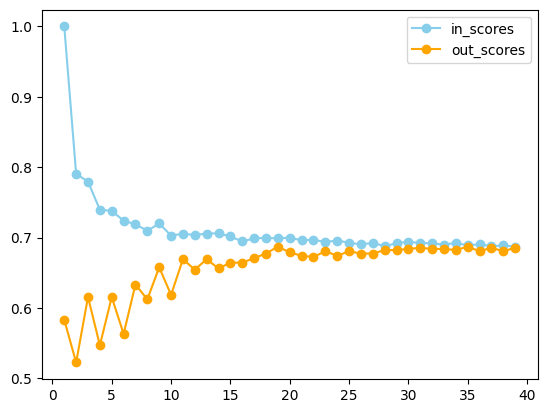

In [35]:
n_list = range(1, 40)
in_scores = []
out_scores = []
for n_neighbors in n_list :
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    scores = cross_validate(knn, X, y, cv = 7, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(n_list, in_scores, 'o-', color = 'skyblue', label = 'in_scores')
plt.plot(n_list, out_scores, 'o-', color = 'orange', label = 'out_scores')
plt.legend()
plt.show()

12

### fine tuning p :

p is the power in the Minkowski metric. p = 2 indicates Euclidean metric

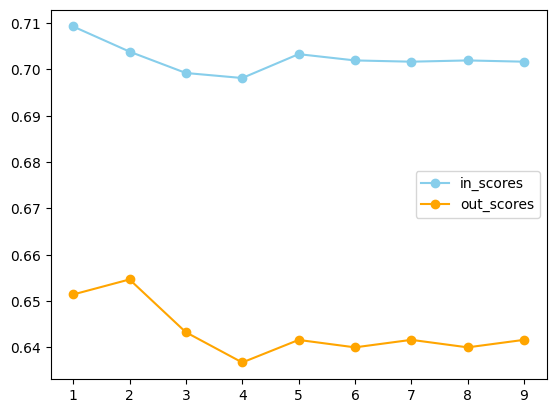

In [37]:
p_list = range(1, 10)
in_scores = []
out_scores = []
for p in p_list :
    knn = KNeighborsClassifier(n_neighbors = 12, p = p)
    scores = cross_validate(knn, X, y, cv = 7, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(p_list, in_scores, 'o-', color = 'skyblue', label = 'in_scores')
plt.plot(p_list, out_scores, 'o-', color = 'orange', label = 'out_scores')
plt.legend()
plt.show()

2 is the default value

In [40]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6774193548387096


# with normalized data

In [41]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_normalized.parquet'))

In [42]:
X = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

In [44]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [45]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.8852459016393442

0.67 with non_normal data and 0.88 with noemal data

it makes sense because knn uses actually a circle to find the neighbors so its better to have a same scale for different axes.

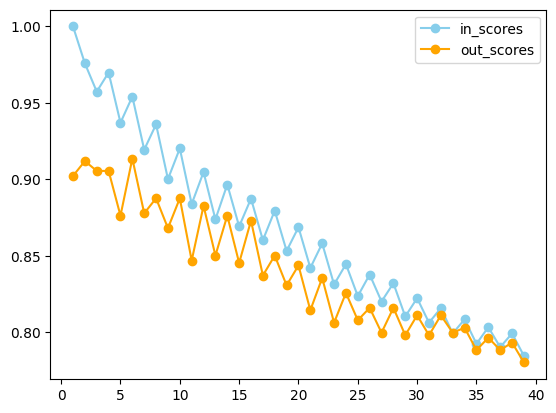

In [49]:
n_list = range(1, 40)
in_scores = []
out_scores = []
for n_neighbors in n_list :
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    scores = cross_validate(knn, X, y, cv = 7, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(n_list, in_scores, 'o-', color = 'skyblue', label = 'in_scores')
plt.plot(n_list, out_scores, 'o-', color = 'orange', label = 'out_scores')
plt.legend()
plt.show()

6

In [50]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9139784946236559

# 67 % accuracy with non_normalized data

# 91 % accuracy with normalized data